In [1]:
#import csv from the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
plt.style.use('ggplot')


df=pd.read_csv('../final.csv')
df[['SUB1','GENDER']].head()


,SUB1,GENDER
0,2,1
1,2,1
2,2,1
3,4,1
4,3,1


In [2]:
print df.memory_usage(index=True).sum()
print 

4516118264



In [3]:
#get the table
dt = df.query('DSMCRIT >= 0').groupby(['ALCFLG','MARFLG', 'COKEFLG', 'HERFLG', 
                                        'METHFLG', 'OPSYNFLG'])['CASEID'].count().reset_index()
print dt

    ALCFLG  MARFLG  COKEFLG  HERFLG  METHFLG  OPSYNFLG   CASEID
0        0       0        0       0        0         0   202378
1        0       0        0       0        0         1   231257
2        0       0        0       0        1         0     6236
3        0       0        0       0        1         1     7411
4        0       0        0       1        0         0   208164
5        0       0        0       1        0         1    47554
6        0       0        0       1        1         0     2184
7        0       0        0       1        1         1     1688
8        0       0        1       0        0         0   114898
9        0       0        1       0        0         1    32342
10       0       0        1       0        1         0      826
11       0       0        1       0        1         1      687
12       0       0        1       1        0         0    71387
13       0       0        1       1        0         1    13476
14       0       0        1       1     

In [79]:
# table for multiple substance user in number
nsum = dt['CASEID'].sum()
print nsum
dt['CASE_PERCENT'] = dt['CASEID'] / nsum
print dt.query('ALCFLG+MARFLG+COKEFLG+HERFLG+METHFLG+OPSYNFLG != 1 and\
               ALCFLG+MARFLG+COKEFLG+HERFLG+METHFLG+OPSYNFLG != 0').sort_values('CASEID', ascending=False)
#print dt.query('NUMSUBS == 0 or NUMSUBS == 2 or NUMSUBS == 3').sort_values('CASEID', ascending=False)

3785492
    ALCFLG  MARFLG  COKEFLG  HERFLG  METHFLG  OPSYNFLG  CASEID  CASE_PERCENT
37       1       1        0       0        0         0  518238      0.136901
33       1       0        1       0        0         0  160429      0.042380
41       1       1        1       0        0         0  134771      0.035602
16       0       1        0       0        0         1   89524      0.023649
27       1       0        0       0        0         1   83279      0.022000
12       0       0        1       1        0         0   71387      0.018858
22       0       1        1       0        0         0   67649      0.017871
38       1       1        0       0        0         1   54807      0.014478
19       0       1        0       1        0         0   50058      0.013224
5        0       0        0       1        0         1   47554      0.012562
30       1       0        0       1        0         0   43942      0.011608
36       1       0        1       1        0         0   32631      

In [ ]:
# dsm diagnosis distribution of multiple substance user

In [58]:
#Chart for `DSM Diagnosis and Substance Abuse` part 1 (count)
#preparsing the data
df4 = df[df['SUB1'].isin([2,3,4,5,7,10])] #top 6 substances
df4 = df4[df4['DSMCRIT'].isin([14,15,16,17,18])] #


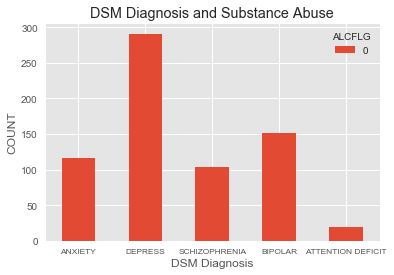

In [70]:
#ploting
#DSMCRIT (later parts) and top 6 sub1
plt.figure()
df5 = df4.query('ALCFLG ==0 and MARFLG == 0 and COKEFLG == 0 and HERFLG == 0 and METHFLG == 0 and OPSYNFLG == 0')
#df5 = df5.groupby(['DSMCRIT'])['SUB1'].value_counts().unstack()#.reset_index(name="count")
df5 = df5.groupby(['DSMCRIT'])['ALCFLG'].value_counts().unstack()#.reset_index(name="count")

df5.plot(kind='bar')
#print (df5.head(12))
#plt.title('Number of Substance by Year')

ax = plt.gca() # grab the current axis
ax.set(xlabel="DSM Diagnosis", ylabel="COUNT")
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["ANXIETY DISORDER","DEPRESSIVE DISORDER","SCHIZOPHRENIA","BIPOLAR DISORDER","ATTENTION DEFICIT"]) 
ax.set_xticklabels(["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]) 
plt.xticks(fontsize='small')
plt.xticks(rotation='horizontal')
#plt.legend(['ALCOHOL', 'COCAINE', 'MARIJUANA', 'HEROIN', 'OPIATES','METH'])
#plt.legend(['No substance'])

plt.title('DSM Diagnosis and Substance Abuse')
plt.show()

Chart for `DSM Diagnosis and Substance Abuse` part 2 (percentage)

ALCFLG     0
DSMCRIT     
14       116
15       291
16       104
17       151
18        20
ALCFLG          0
DSMCRIT          
14       0.170088
15       0.426686
16       0.152493
17       0.221408
18       0.029326


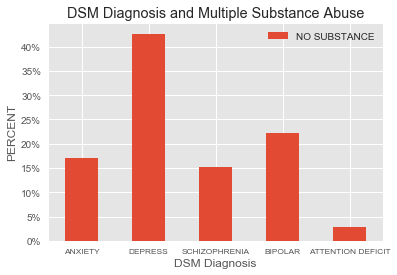

In [72]:
df6 = df5
print df6
df8 = df6#.reset_index()
df8[0] = df8[0] / df8[0].sum()
#print df8.reset_index(level = 1)
print df8

from matplotlib.ticker import FuncFormatter

plt.figure()


ax = df8.plot(kind='bar')
#ax.legend(bbox_to_anchor=(1.2, 1.2))

#df6.groupby(['YEAR']).plot.bar(x='SUB1', y='count')
#df6.groupby(['YEAR','SUB1'])['SUB1'].sum().plot.bar()

ax = plt.gca() # grab the current axis
ax.set(xlabel="DSM Diagnosis", ylabel="PERCENT")
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]) 
ax.set_xticklabels(["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]) 
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

#df6.plot(kind='bar')
#pd.crosstab(df5['YEAR'],df5['SUB1']).plot.bar()
plt.title('DSM Diagnosis and Multiple Substance Abuse')
plt.xticks(fontsize='small')
plt.xticks(rotation='horizontal')
#plt.legend(['ALCOHOL', 'COCAINE', 'MARIJUANA', 'HEROIN', 'OPIATES','METH'])
plt.legend(['NO SUBSTANCE'])

plt.show()

Chart for `Selected states and Substance Abuse` 

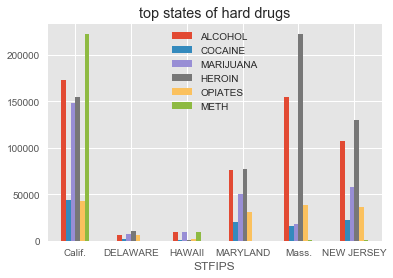

In [7]:
#ethnic and sub1
plt.figure()
#df5 = df[df['SUB1'].isin([2,5,4,10,7,3])] #top 6 substances in order
df5 = df[df['SUB1'].isin([2,3,4,5,7,10])] #top 6 substances

#df5 = df5[df5['STFIPS'].isin([36,6,25,39,8])] #5 most admitted states in order
df5 = df5[df5['STFIPS'].isin([6,10,15,24,25,34])] # most hard drugs state


df5 = df5.groupby(['STFIPS'])['SUB1'].value_counts().unstack()#.reset_index(name="count")

df5.plot(kind='bar')
#print (df5.head(12))
plt.title('top states of hard drugs')
ax = plt.gca() # grab the current axis
ax.set_xticklabels(["Calif.","DELAWARE","HAWAII","MARYLAND", "Mass.", "NEW JERSEY"]) 
#plt.xticks(fontsize='small')
plt.xticks(rotation='horizontal')
plt.legend(['ALCOHOL', 'COCAINE', 'MARIJUANA', 'HEROIN', 'OPIATES','METH'])

plt.show()

SUB1        2      3       4       5      7       10
STFIPS                                              
6       173237  43436  148616  155143  42454  222754
10        6589   1618    7074   10615   5944      44
15        9940    739    9801     648   1430    9989
24       75819  20353   50209   77764  30646     193
25      154398  16437   18075  221917  38045     450
34      107179  22066   58353  129669  36779     499
STFIPS
6     785640
10     31884
15     32547
24    254984
25    449322
34    354545
dtype: int64


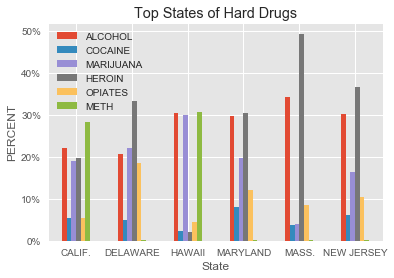

In [8]:
#top state of drugs part2(percentage)
df6 = df5
print df6
df7 = df6.sum(axis=1)
print df7
df8 = df6
for i in [2,5,4,10,7,3]:
    df8[i] = df6[i] / df7
    
from matplotlib.ticker import FuncFormatter

plt.figure()


ax = df8.plot(kind='bar')
ax.legend(bbox_to_anchor=(1.2, 1.2))

#df6.groupby(['YEAR']).plot.bar(x='SUB1', y='count')
#df6.groupby(['YEAR','SUB1'])['SUB1'].sum().plot.bar()

ax = plt.gca() # grab the current axis
ax.set(xlabel="State", ylabel="PERCENT")
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]) 
ax.set_xticklabels(["CALIF.","DELAWARE","HAWAII","MARYLAND", "MASS.", "NEW JERSEY"]) 
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

#df6.plot(kind='bar')
#pd.crosstab(df5['YEAR'],df5['SUB1']).plot.bar()
plt.title('Top States of Hard Drugs')
#plt.xticks(fontsize='small')
plt.xticks(rotation='horizontal')
plt.legend(['ALCOHOL', 'COCAINE', 'MARIJUANA', 'HEROIN', 'OPIATES','METH'])
plt.show()

SUB1       2       3       4        5       7       10
RACE                                                  
2      121907    5484   28988    13040   14246   16661
4      627801  305726  506879   230799   35195   21703
5     2373708  263301  805797  1107423  735263  447750
13      20479    2604   10362     5831    2712   11488


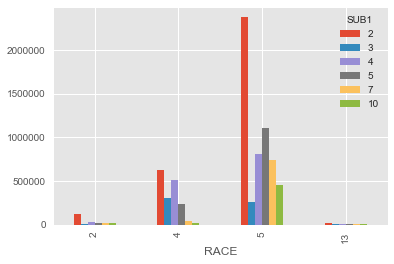

In [9]:
#race and sub1 part1
plt.figure()
df5 = df[df['SUB1'].isin([2,5,4,10,7,3])]
df5 = df5[df5['RACE'].isin([5,4,2,13])]

df5 = df5.groupby(['RACE'])['SUB1'].value_counts().unstack()#.reset_index(name="count")

df5.plot(kind='bar')
print (df5.head(12))
#plt.title('Number of Substance by Year')

#ax = plt.gca() # grab the current axis
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["12-14","18-20","25-29","35-39","45-49","55 AND OVER"]) 
plt.show()
# set the labels to display at those ticks

df6 = df5

In [83]:
# finding relation : substance v.s. primpay method

df11 = df.query('NUMSUBS == 1 and PRIMPAY >= 0')

print "overall"
c2 = df11['PRIMPAY'].count()
r2 = df11['PRIMPAY'].value_counts() / c2 
print r2.head(4)

print "alcohol"
c2 = df11.query('ALCFLG == 1')['PRIMPAY'].count()
r2 = df11.query('ALCFLG == 1')['PRIMPAY'].value_counts() / c2 
print r2.head(4)

print "marijuana"
c2 = df11.query('MARFLG == 1')['PRIMPAY'].count()
r2 = df11.query('MARFLG == 1')['PRIMPAY'].value_counts() / c2 
print r2.head(4)

print "meth"
c2 = df11.query('MTHAMFLG == 1')['PRIMPAY'].count()
r2 = df11.query('MTHAMFLG == 1')['PRIMPAY'].value_counts() / c2 
print r2.head(4)

print "cocaine"
c2 = df11.query('COKEFLG == 1')['PRIMPAY'].count()
r2 = df11.query('COKEFLG == 1')['PRIMPAY'].value_counts() / c2 
print r2.head(4)

print "heroin"
c2 = df11.query('HERFLG == 1')['PRIMPAY'].count()
r2 = df11.query('HERFLG == 1')['PRIMPAY'].value_counts() / c2 
print r2.head(4)

print "BENZFLG benzo"
c2 = df11.query('BENZFLG == 1')['PRIMPAY'].count()
r2 = df11.query('BENZFLG == 1')['PRIMPAY'].value_counts() / c2 
print r2.head(4)


overall
5    0.421687
1    0.175380
4    0.156413
9    0.122389
Name: PRIMPAY, dtype: float64
alcohol
5    0.375418
1    0.234552
9    0.160926
4    0.101067
Name: PRIMPAY, dtype: float64
marijuana
5    0.422099
4    0.273290
1    0.110217
9    0.071742
Name: PRIMPAY, dtype: float64
meth
5    0.490132
4    0.151387
1    0.133685
9    0.127617
Name: PRIMPAY, dtype: float64
cocaine
5    0.502592
4    0.205741
1    0.092045
9    0.083454
Name: PRIMPAY, dtype: float64
heroin
5    0.556259
4    0.189831
1    0.082492
9    0.066728
Name: PRIMPAY, dtype: float64
BENZFLG benzo
5    0.453354
4    0.175059
1    0.122968
9    0.089345
Name: PRIMPAY, dtype: float64


overall
3    0.383484
4    0.353144
1    0.184907
2    0.078465
Name: EMPLOY, dtype: float64
alcohol
3    0.356589
4    0.301445
1    0.256075
2    0.085891
Name: EMPLOY, dtype: float64
marijuana
4    0.461735
3    0.323629
1    0.125387
2    0.089249
Name: EMPLOY, dtype: float64
meth
3    0.455368
4    0.357958
1    0.111321
2    0.075353
Name: EMPLOY, dtype: float64
cocaine
3    0.437333
4    0.403985
1    0.103288
2    0.055394
Name: EMPLOY, dtype: float64
heroin
3    0.457449
4    0.404943
1    0.086714
2    0.050894
Name: EMPLOY, dtype: float64
BENZFLG benzo
4    0.440599
3    0.413747
1    0.095012
2    0.050641
Name: EMPLOY, dtype: float64


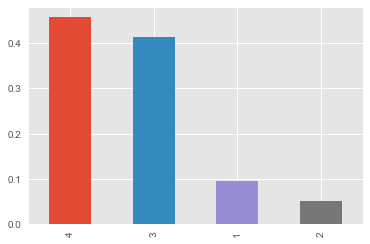

In [92]:
# finding relation: substance v.s. occupation

df12 = df.query('NUMSUBS == 1 and EMPLOY >= 0')

plt.figure()


print "overall"
c2 = df12['EMPLOY'].count()
r2 = df12['EMPLOY'].value_counts() / c2 
print r2.head(4)

print "alcohol"
c2 = df12.query('ALCFLG == 1')['EMPLOY'].count()
r2 = df12.query('ALCFLG == 1')['EMPLOY'].value_counts() / c2 
print r2.head(4)

print "marijuana"
c2 = df12.query('MARFLG == 1')['EMPLOY'].count()
r2 = df12.query('MARFLG == 1')['EMPLOY'].value_counts() / c2 
print r2.head(4)

print "meth"
c2 = df12.query('MTHAMFLG == 1')['EMPLOY'].count()
r2 = df12.query('MTHAMFLG == 1')['EMPLOY'].value_counts() / c2 
print r2.head(4)

print "cocaine"
c2 = df12.query('COKEFLG == 1')['EMPLOY'].count()
r2 = df12.query('COKEFLG == 1')['EMPLOY'].value_counts() / c2 
print r2.head(4)

print "heroin"
c2 = df12.query('HERFLG == 1')['EMPLOY'].count()
r2 = df12.query('HERFLG == 1')['EMPLOY'].value_counts() / c2 
print r2.head(4)
ax = r2.plot(kind='bar')

print "BENZFLG benzo"
c2 = df12.query('BENZFLG == 1')['EMPLOY'].count()
r2 = df12.query('BENZFLG == 1')['EMPLOY'].value_counts() / c2 
print r2.head(4)
ax = r2.plot(kind='bar')
plt.xticks(rotation='horizontal')


plt.show()


overall
0    0.620256
1    0.082720
7    0.030954
2    0.028050
5    0.024039
Name: DAYWAIT, dtype: float64
alcohol
0    0.604202
1    0.074891
7    0.032970
2    0.027879
5    0.025809
Name: DAYWAIT, dtype: float64
marijuana
0    0.628276
1    0.058204
7    0.035284
5    0.023974
2    0.020678
Name: DAYWAIT, dtype: float64
meth
0    0.693735
1    0.046448
7    0.027452
2    0.020362
5    0.017955
Name: DAYWAIT, dtype: float64
cocaine
0    0.666921
1    0.068815
7    0.028896
2    0.024104
5    0.022837
Name: DAYWAIT, dtype: float64
heroin
0    0.603725
1    0.143050
2    0.038038
3    0.027470
7    0.024815
Name: DAYWAIT, dtype: float64
BENZFLG benzo
0    0.622445
1    0.127073
2    0.031238
7    0.028346
3    0.022561
Name: DAYWAIT, dtype: float64


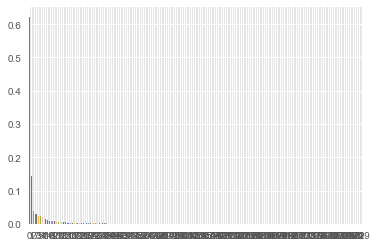

In [94]:
# finding relation: substance v.s. occupation

df13 = df.query('NUMSUBS == 1 and DAYWAIT >= 0')

plt.figure()


print "overall"
c2 = df13['DAYWAIT'].count()
r2 = df13['DAYWAIT'].value_counts() / c2 
print r2.head(5)

print "alcohol"
c2 = df13.query('ALCFLG == 1')['DAYWAIT'].count()
r2 = df13.query('ALCFLG == 1')['DAYWAIT'].value_counts() / c2 
print r2.head(5)

print "marijuana"
c2 = df13.query('MARFLG == 1')['DAYWAIT'].count()
r2 = df13.query('MARFLG == 1')['DAYWAIT'].value_counts() / c2 
print r2.head(5)

print "meth"
c2 = df13.query('MTHAMFLG == 1')['DAYWAIT'].count()
r2 = df13.query('MTHAMFLG == 1')['DAYWAIT'].value_counts() / c2 
print r2.head(5)

print "cocaine"
c2 = df13.query('COKEFLG == 1')['DAYWAIT'].count()
r2 = df13.query('COKEFLG == 1')['DAYWAIT'].value_counts() / c2 
print r2.head(5)

print "heroin"
c2 = df13.query('HERFLG == 1')['DAYWAIT'].count()
r2 = df13.query('HERFLG == 1')['DAYWAIT'].value_counts() / c2 
print r2.head(5)
ax = r2.plot(kind='bar')

print "BENZFLG benzo"
c2 = df13.query('BENZFLG == 1')['DAYWAIT'].count()
r2 = df13.query('BENZFLG == 1')['DAYWAIT'].value_counts() / c2 
print r2.head(5)
ax = r2.plot(kind='bar')
plt.xticks(rotation='horizontal')


plt.show()

